In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

In [2]:
# Loading the datasets
true_data = pd.read_csv("True.csv")
fake_data = pd.read_csv("Fake.csv")

In [3]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Adding labels to the datasets
true_data["label"] = 1  # Real news
fake_data["label"] = 0  # Fake news

In [6]:
# Combining the datasets
data = pd.concat([true_data, fake_data]).reset_index(drop=True)

In [7]:
# Shuffling the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
# Data preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = text.lower()  
    text = text.strip()  
    return text

data['text'] = data['text'].apply(preprocess_text)

In [9]:
# Separating features and labels
X = data['text']
y = data['label']

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Converting text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [13]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [14]:
# Predicting and evaluating Logistic Regression
lr_train_predictions = lr_model.predict(X_train_tfidf)
lr_test_predictions = lr_model.predict(X_test_tfidf)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
print("Logistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_test_predictions))

Logistic Regression Training Accuracy: 0.9905896764853277
Logistic Regression Testing Accuracy: 0.9869710467706013
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [16]:
# Predicting and evaluating Naive Bayes
nb_train_predictions = nb_model.predict(X_train_tfidf)
nb_test_predictions = nb_model.predict(X_test_tfidf)
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
print("Naive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Testing Accuracy:", nb_test_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_test_predictions))

Naive Bayes Training Accuracy: 0.9333481819700429
Naive Bayes Testing Accuracy: 0.9275055679287305
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4669
           1       0.93      0.92      0.92      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [17]:
# Comparative Analysis: Confusion Matrices and Metrics
lr_cm = confusion_matrix(y_test, lr_test_predictions)
nb_cm = confusion_matrix(y_test, nb_test_predictions)

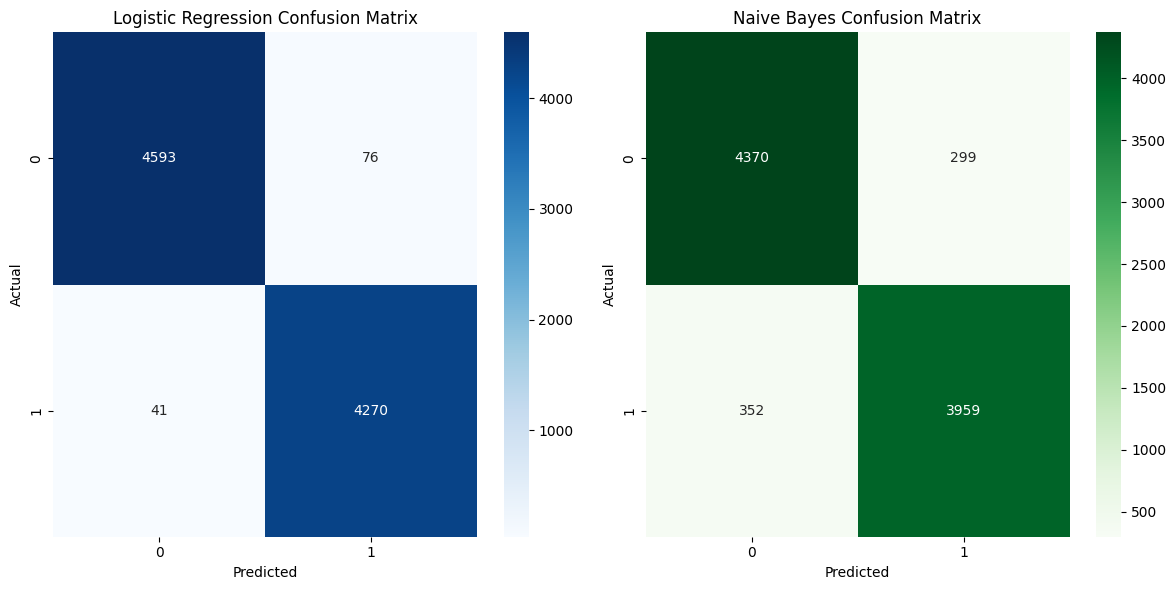

In [18]:
import matplotlib.pyplot as plt
# Plotting Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig("ConfusionMatrix.jpg")
plt.show()

In [19]:
# Metrics Comparison Table
metrics_data = {
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Training Accuracy": [lr_train_accuracy, nb_train_accuracy],
    "Testing Accuracy": [lr_test_accuracy, nb_test_accuracy],
}
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.990590          0.986971
1          Naive Bayes           0.933348          0.927506


In [20]:
import pickle

# Saving Logistic Regression model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Saving Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


In [21]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the pre-trained models and vectorizer
log_reg_model = joblib.load('logistic_model.pkl')  
naive_bayes_model = joblib.load('naive_bayes_model.pkl')  
vectorizer = joblib.load('tfidf_vectorizer.pkl')  

# Function to predict if the news is fake or true
def predict_news(article):
    input_vector = vectorizer.transform([article])  
    log_reg_prediction = log_reg_model.predict(input_vector) 
    naive_bayes_prediction = naive_bayes_model.predict(input_vector)
    
    return (f"Logistic Regression Prediction: {'Fake' if log_reg_prediction == 0 else 'True'}",
            f"Naive Bayes Prediction: {'Fake' if naive_bayes_prediction == 0 else 'True'}")

# Taking input from the user
article = input("Enter the article text: ")

# Displaying the predictions
predictions = predict_news(article)
for prediction in predictions:
    print(prediction)


Logistic Regression Prediction: Fake
Naive Bayes Prediction: Fake


In [22]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display, Markdown

# Loading the pre-trained models and vectorizer
log_reg_model = joblib.load('logistic_model.pkl')  
naive_bayes_model = joblib.load('naive_bayes_model.pkl')  
vectorizer = joblib.load('tfidf_vectorizer.pkl')  

# Function to predict if the news is fake or true
def predict_news(article):
    input_vector = vectorizer.transform([article])  
    log_reg_prediction = log_reg_model.predict(input_vector) 
    naive_bayes_prediction = naive_bayes_model.predict(input_vector)
    
    return (f"Logistic Regression Prediction: {'Fake' if log_reg_prediction == 0 else 'True'}",
            f"Naive Bayes Prediction: {'Fake' if naive_bayes_prediction == 0 else 'True'}")

# Taking input from the user
article = input("Enter the article text: ")

# Displaying the input
display(Markdown(f"### **Input Article:**\n\n{article}"))

# Displaying the predictions
predictions = predict_news(article)
for prediction in predictions:
    display(Markdown(f"**{prediction}**"))


### **Input Article:**

Aliens have landed on Earth.

**Logistic Regression Prediction: Fake**

**Naive Bayes Prediction: Fake**